# **Ensemble methods**

# Iris Dataset

Il dataset Iris è un classico dataset nell'apprendimento automatico e nella statistica, introdotto da Ronald Fisher nel 1936. È comunemente utilizzato per attività di classificazione e clustering.

## Caratteristiche e Struttura
- **Campioni**: 150 campioni di fiori iris.
- **Features**:
  - Lunghezza del sepalo (cm)
  - Larghezza del sepalo (cm)
  - Lunghezza del petalo (cm)
  - Larghezza del petalo (cm)
- **Classi (Etichette Target)**:
  - *Iris-setosa*
  - *Iris-versicolor*
  - *Iris-virginica*

Ogni classe è rappresentata da 50 campioni.

## Caratteristiche Principali
- **Balanced Dataset**: Ogni classe contiene lo stesso numero di campioni.
- **Perfect for Beginners**: a sua semplicità e struttura ben definita lo rendono perfetto per scopi didattici.
- **Separable Classes**:
  - *Iris-setosa* è linearmente separabile dalle altre due classi.
  - *Iris-versicolor* e *Iris-virginica* sono più difficili da separare tra loro.


# Iris Dataset Classes

<table>
    <tr>
        <th>Iris Setosa</th>
        <th>Iris Versicolor</th>
        <th>Iris Virginica</th>
    </tr>
    <tr>
        <td><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSFn-u9Lagrv8pV4zJ8Z1cEqXNL_uo39CrL6A&s" alt="Iris setosa" width="300" height="300"></td>
        <td><img src="https://encrypted-tbn3.gstatic.com/images?q=tbn:ANd9GcSJqxUtJiLfMX5aIoyPTPz7rMdjxgWagMlBzt0QbfATKzRqH4XnMMDN5aBrU1FvRt19jkHMOrIefjywQlDg9rOeKC6JbA72Wf--jqHD-g" alt="Iris versicolor" alt="Iris versicolor" width="300" height="300"></td>
        <td><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSQbTwTLA7_7SeTE3B1QOKw0TlB8Rp6NU7vyg&s" alt="Iris virginica" width="300" height="300"></td>
    </tr>
</table>



# `plot_decision_boundary` Function

La funzione `plot_decision_boundary` permette di visualizzare i margini decisionali di un classificatore. In questo modo è possibile visualizzare come il modello distingue le feature di campioni assegnati a classi diverse.

1. **Parametri**:
    - `clf`: Il classificatore allenato che ha il metodo `predict`.
    - `X`: La matrice dei dati di input, per cui si assume una dimensione 2D per la visualizzazione.
    - `y`: Le labels corrispondenti ai dati `X`.

2. **Output**:
    - Un grafico 2D contenente:
        - **Features**: `Feature 1` e `Feature 2` lungo l' asse x e y (se è stata usata PCA, queste sono le 2 componenti).
        - **Regioni decisionali**: Colori diversi indicano regioni classificate come labels diverse.
        - **Camponi**: I punti del dataset (`X`) sono sovrapposti alle regioni e colorati in base alla loro label corretta (`y`).

### **Sintassi**

```python
plot_decision_boundary(trained_model, X_data, y_data)
```


In [ ]:
# Helper function to create the plot
# and visualize the decision boundary
import matplotlib.pyplot as plt
import numpy as np


def plot_decision_boundary(clf, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.RdYlBu)
    plt.title("Decision Boundary Visualization")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

## Funzione `train_test_split()` :

---

## **train_test_split()**

La funzione `train_test_split()` è parte del modulo `sklearn.model_selection`. Viene utilizzata per dividere un dataset in training e test set.


### **Esempio**:
```python
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data: {len(X_train)} samples")
print(f"Testing data: {len(X_test)} samples")
```


# **Esercizio 1: Classifichiamo il dataset Iris con un DecisionTree**

Eseguire tutti gli step di preparazione per l' allenamento di un DecisionTree. Per lo split dai dati in training e test utilizzare:

- `test_size` = `0.3`

- `random_state` = `42`

Decision Tree Accuracy: 0.93


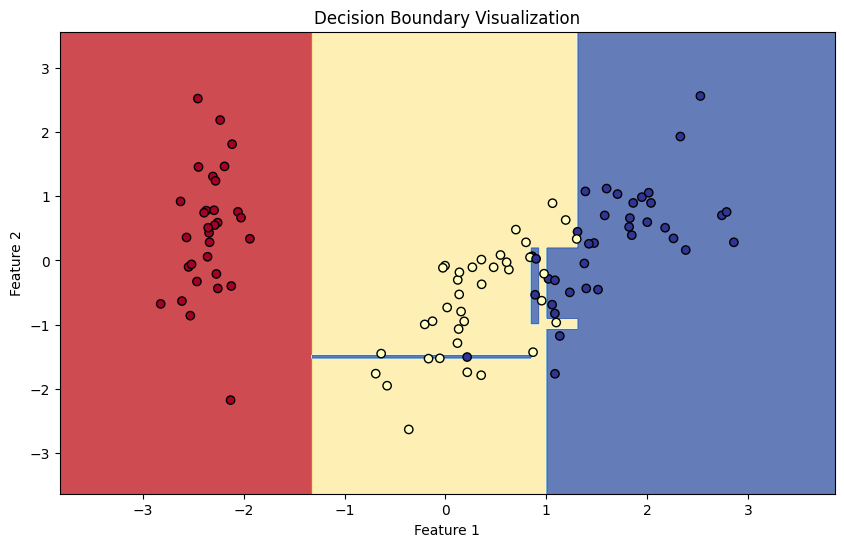

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train_pca, y_train)

y_pred = tree_clf.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.2f}")

plot_decision_boundary(tree_clf, X_train_pca, y_train)

# **Eesercizio 2: Implementare ensamble methods**

Una volta allenato il DecisionTree nell' esercizio 1, vogliamo applicarvi i metodi di ensamble. Nello specifico andremo a implementare:

* **AdaBoost**
* **Bagging**
* **Random Forest**

Di seguito vediamo la sintassi di ognuno di questi.

## 1. **AdaBoostClassifier**:

L' `AdaBoostClassifier` crea un insieme di alberi decisionali deboli. Assegna un peso a ciascun albero e li combina per formare un modello più robusto.

### Example:
```python
from sklearn.ensemble import AdaBoostClassifier

# Train the model
ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
ada_clf.fit(X_train, y_train)

# Get predictions
predictions = ada_clf.predict(X_test)

```

---

## 2. **RandomForestClassifier**:

Il `RandomForestClassifier` costruisce più alberi in parallelo e combina i loro risultati per migliorare l'accuratezza.

### Example:
```python
from sklearn.ensemble import RandomForestClassifier

# Train the model
rf_clf = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=42)
rf_clf.fit(X_train, y_train)

# Get predictions
predictions = rf_clf.predict(X_test)

```

#### **N.B. RandomForest non richiede come argomento il classificatore, differentemente dagli altri metodi.**

---

## 3. **BaggingClassifier**:

Il `BaggingClassifier` combina molteplici modelli base (come DecisionTree) utilizzando la tecnica del bootstrapping per ridurre la varianza.

### Example:
```python
from sklearn.ensemble import BaggingClassifier

# Train the model
bag_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
bag_clf.fit(X_train, y_train)

# Get predictions
predictions = bag_clf.predict(X_test)

```


AdaBoost Accuracy: 0.9333
Random Forest Accuracy: 0.8889
Bagging Accuracy: 0.9333

Decision Boundaries Visualization:

AdaBoost:


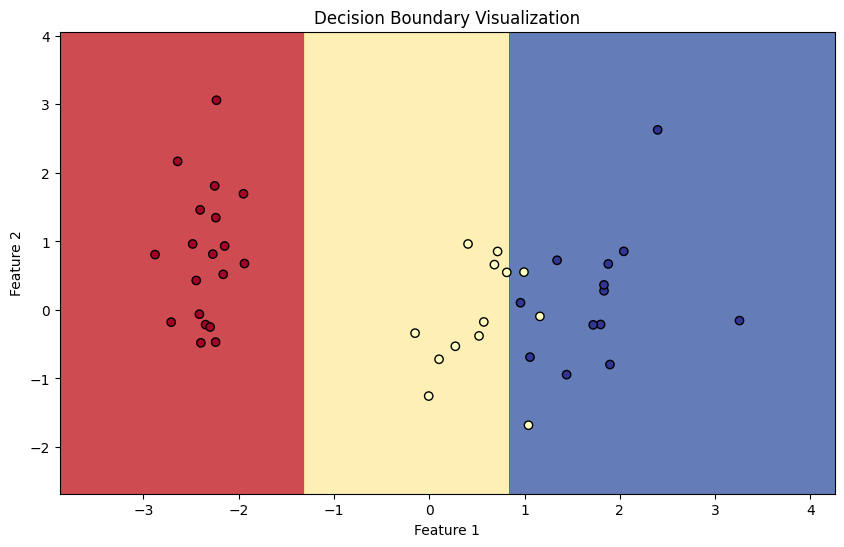


Random Forest:


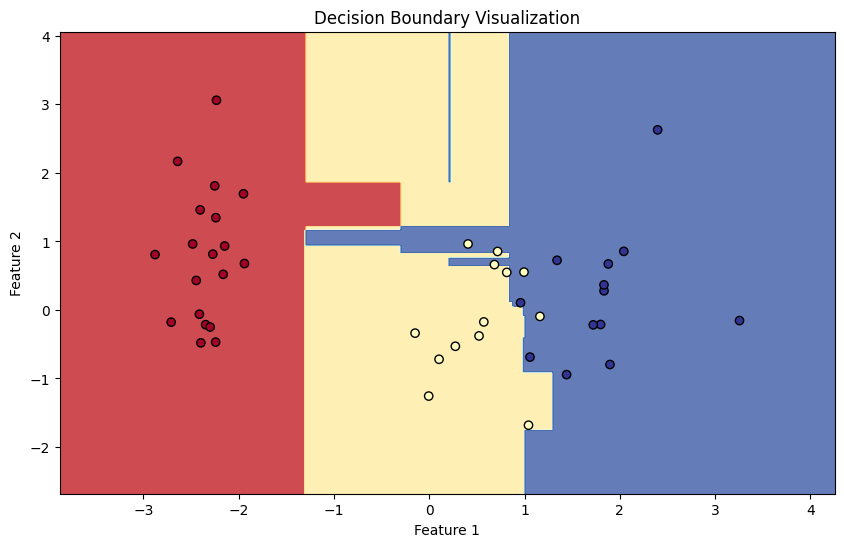


Bagging:


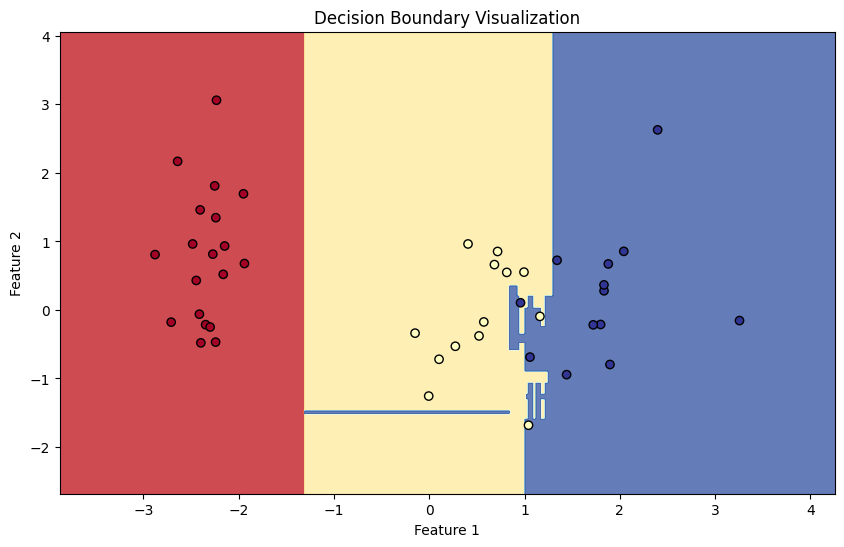

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    random_state=42
)
ada_clf.fit(X_train_pca, y_train)
ada_pred = ada_clf.predict(X_test_pca)
ada_accuracy = accuracy_score(y_test, ada_pred)
print(f"AdaBoost Accuracy: {ada_accuracy:.4f}")

rf_clf = RandomForestClassifier(
    n_estimators=10,
    max_depth=3,
    random_state=42
)
rf_clf.fit(X_train_pca, y_train)
rf_pred = rf_clf.predict(X_test_pca)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

bag_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=10,
    random_state=42
)
bag_clf.fit(X_train_pca, y_train)
bag_pred = bag_clf.predict(X_test_pca)
bag_accuracy = accuracy_score(y_test, bag_pred)
print(f"Bagging Accuracy: {bag_accuracy:.4f}")

print("\nDecision Boundaries Visualization:")
models = {
    "AdaBoost": ada_clf,
    "Random Forest": rf_clf,
    "Bagging": bag_clf
}

for name, model in models.items():
    print(f"\n{name}:")
    plot_decision_boundary(model, X_test_pca, y_test)

# Funzioni utili per Ensemble Models

---

## **1. Hard Voting tra tre classificatori**

### **Descrizione**:
Combina le predizioni da tre classificatori selezionando la casse più votata per ogni campione.

### **Parametri**:
- `pred1` (numpy array): Predizioni del classificatore 1.
- `pred2` (numpy array): Predizioni del classificatore 2.
- `pred3` (numpy array): Predizioni del classificatore 3.

### **Output**:
- Restituisce un numpy array conenente la classe più votata per ogni campione.

### **Sintassi**:
```python
voted = hard_voting(pred1_test, pred2_test, pred3_test)
print("Hard Voting Predictions:", voted)
```

---

## **2. Allineare predizioni a più classi**

### **Descrizione**:
Allinea le probabilità in modo da rendere compatibili diversi subsets quando vengono combinati.

### **Parametri**:
- `pred` (numpy array): Probabilità predette da un classificatore.
- `classes_present` (list): Classi conosciute dal classificatore.
- `n_classes` (int, optional): Numero totale di classe, default è 3.

### **Output**:
- Ritorna un numpy array con le proabilità allineate tra tutte le classi
- Returns a numpy array with probabilities aligned across all classes.

### **Sintassi**:
```python
aligned_probs = align_predictions(pred, [0, 1], n_classes=3)
print("Aligned Probabilities:", aligned_probs)

Matrice originale [[0.7, 0.3], [0.4, 0.6]]
diventa
Matrice allineata [[0.7, 0, 0.3], [0.4, 0, 0.6]]

```

---

## **3. Plot Decision Boundary**

### **Descrizione**:
Visualizza i margini decisionali per vari ensamble methods, inclusi `expert1`, `expert2`, `expert3`, `base`, `soft_voting`, `hard_voting`, e `gating`.

### **Parametri**:
- `X` (numpy array): Dati per la visualizzazione (2D).
- `y` (numpy array): Lables originali.
- `clf1`, `clf2`, `clf3` (classifiers, optional): Esperti usati per calcolare prediction.
- `base` (classifier, optional): Classificatore base.
- `mode` (string): Metodo di ensamble per la visualizzazione. I valori possibili sono: `"expert1"`, `"expert2"`, `"expert3"`, `"base"`, `"soft_voting"`, `"hard_voting"`, `"gating"`.


### **Output**:
- Displays a decision boundary plot for the selected mode.

### **Usage**:
```python
plot_decision_boundary(x_test, y_test, expert1=expert1, clf2=expert2, clf3=expert3, base=base_network, mode="soft_voting")
```


# **Esercizio 3: Implementare Mixture of Experts**

Nel seguente esercizio vogliamo implementare un meccanismo di Mixture of Experts. Poichè in iris sono presenti 3 classi, vogliamo allenare 3 classificatori (cioè 3 esperi), rispettivamente:

- esperto 1: riconosce tra la classe 0 e la classe 1.
- esperto 2: riconosce tra la classe 0 e la classe 2.
- esperto 3: riconosce tra la classe 1 e la classe 2.

Infine utilizzare la funzione `plot_modes` per plottare le diverse modalità.

In [ ]:
def hard_voting(pred1, pred2, pred3):
    combined = np.vstack([pred1, pred2, pred3]).T
    voted = []
    for sample in combined:
        counts = np.bincount(sample)
        most_common_label = counts.argmax()
        voted.append(most_common_label)
    return np.array(voted)

def align_predictions(pred, classes_present, n_classes=3):
    aligned = np.zeros((len(pred), n_classes))
    for idx, class_label in enumerate(classes_present):
        aligned[:, class_label] = pred[:, idx]
    return aligned

def plot_modes(X, y, clf1=None, clf2=None, clf3=None, base=None, mode="expert1"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    grid = np.c_[xx.ravel(), yy.ravel()]

    if mode.startswith("expert"):
        expert_map = {
            "expert1": (clf1, [0, 1]),
            "expert2": (clf2, [0, 2]),
            "expert3": (clf3, [1, 2]),
        }
        clf, classes = expert_map[mode]
        Z = clf.predict(grid).reshape(xx.shape)
        title = f"Decision Boundary - {mode.capitalize()}"

    elif mode == "base":
        Z = base.predict(grid).reshape(xx.shape)
        title = "Decision Boundary - Base Network"

    elif mode == "soft_voting":
        Z1 = align_predictions(clf1.predict_proba(grid), [0, 1])
        Z2 = align_predictions(clf2.predict_proba(grid), [0, 2])
        Z3 = align_predictions(clf3.predict_proba(grid), [1, 2])
        Z = (Z1 + Z2 + Z3).argmax(axis=1).reshape(xx.shape)
        title = "Decision Boundary - Soft Voting"

    elif mode == "hard_voting":
        Z1 = clf1.predict(grid)
        Z2 = clf2.predict(grid)
        Z3 = clf3.predict(grid)
        Z = np.array([Z1, Z2, Z3])
        Z = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=Z)
        Z = Z.reshape(xx.shape)
        title = "Decision Boundary - Hard Voting"

    elif mode == "gating":
        gating_weights = base.predict_proba(grid)
        gating_weights /= gating_weights.sum(axis=1, keepdims=True)
        Z1 = align_predictions(clf1.predict_proba(grid), [0, 1])
        Z2 = align_predictions(clf2.predict_proba(grid), [0, 2])
        Z3 = align_predictions(clf3.predict_proba(grid), [1, 2])
        Z = gating_weights * Z1 + gating_weights * Z2 + gating_weights * Z3
        Z = Z.argmax(axis=1).reshape(xx.shape)
        title = "Decision Boundary - Mixture of Experts (Gating)"

    else:
        raise ValueError(f"Unknown mode: {mode}")

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.RdYlBu)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

Hard Voting Accuracy: 0.93
Soft Voting Accuracy: 0.93
Gating Network Accuracy: 0.93


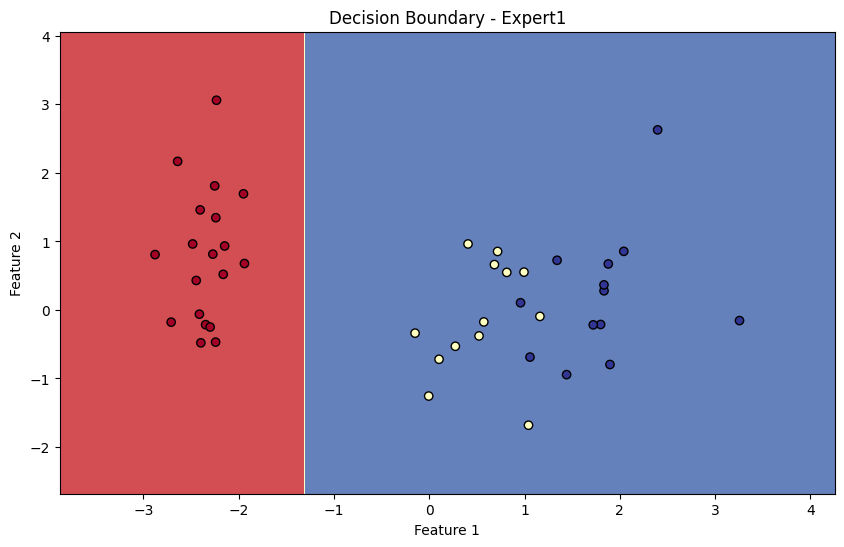

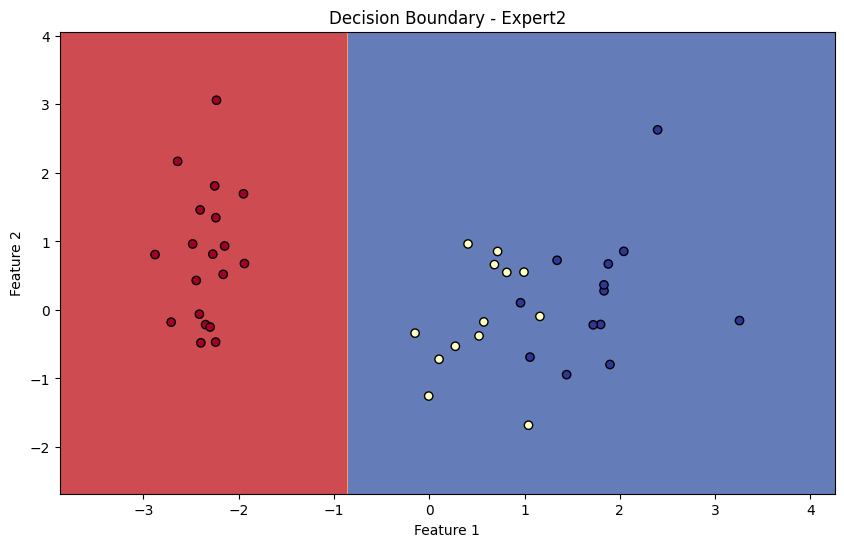

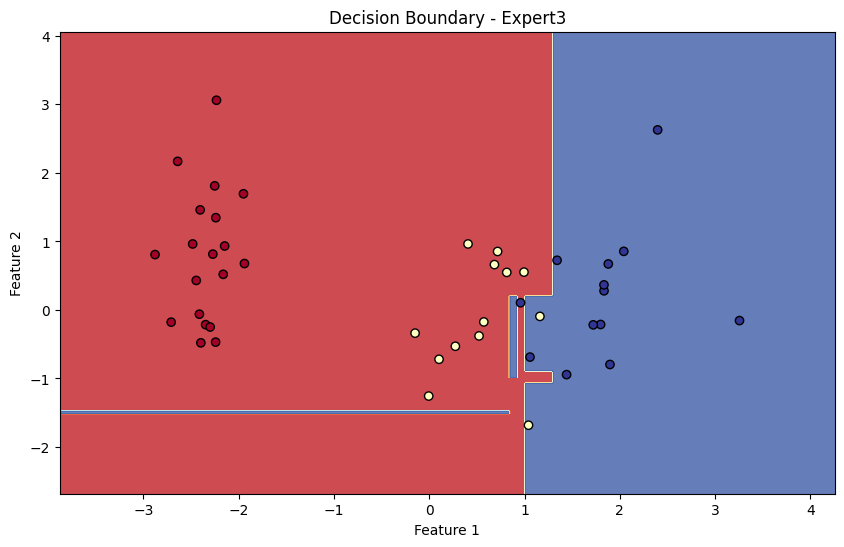

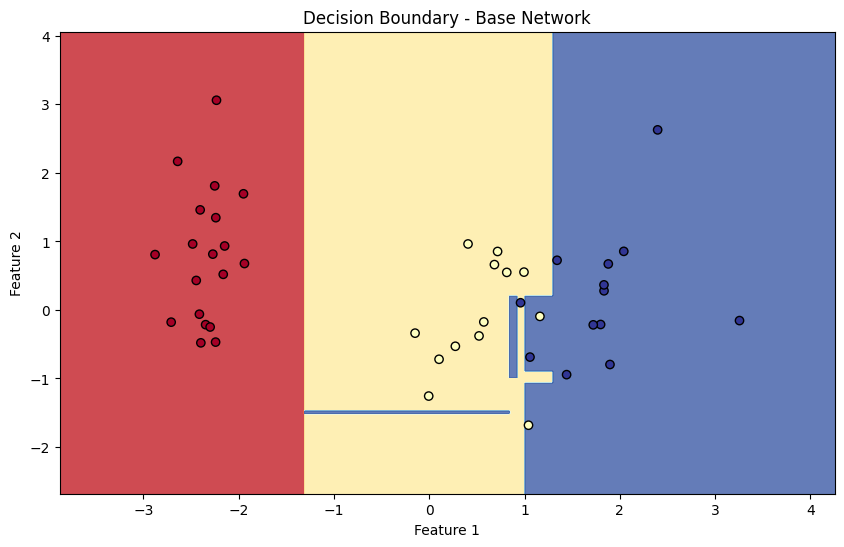

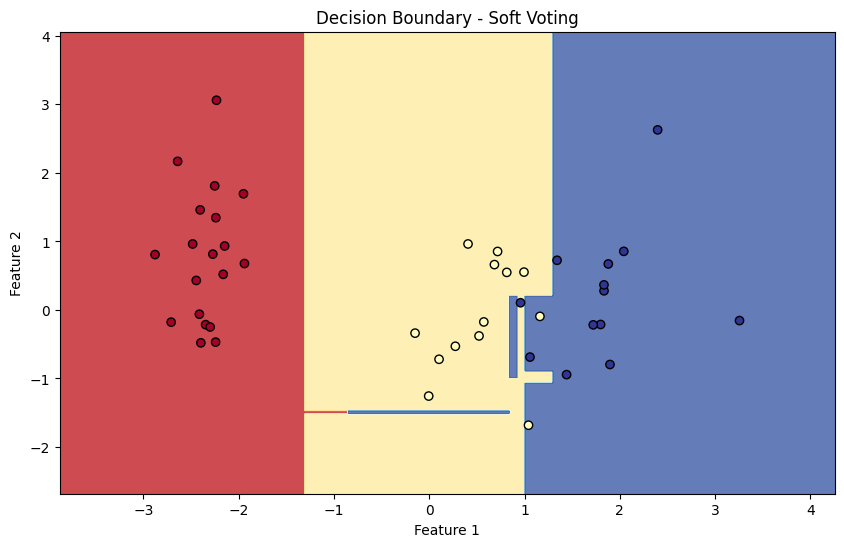

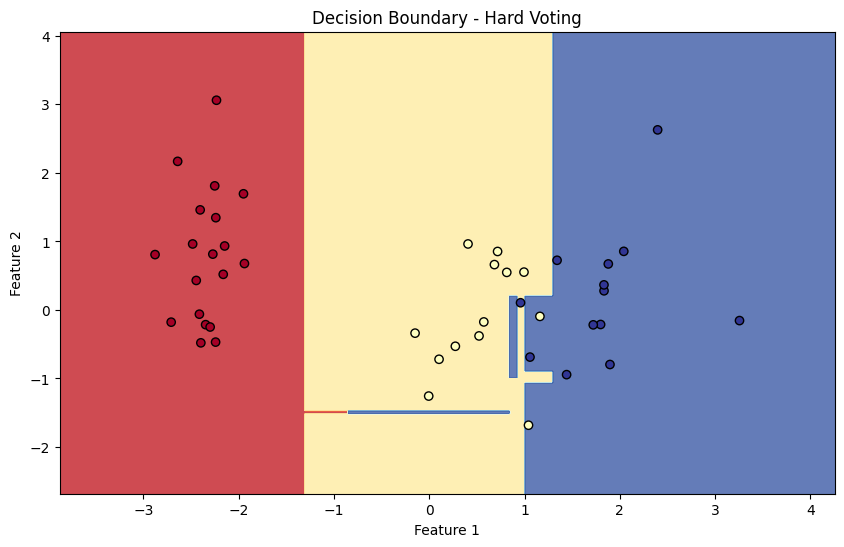

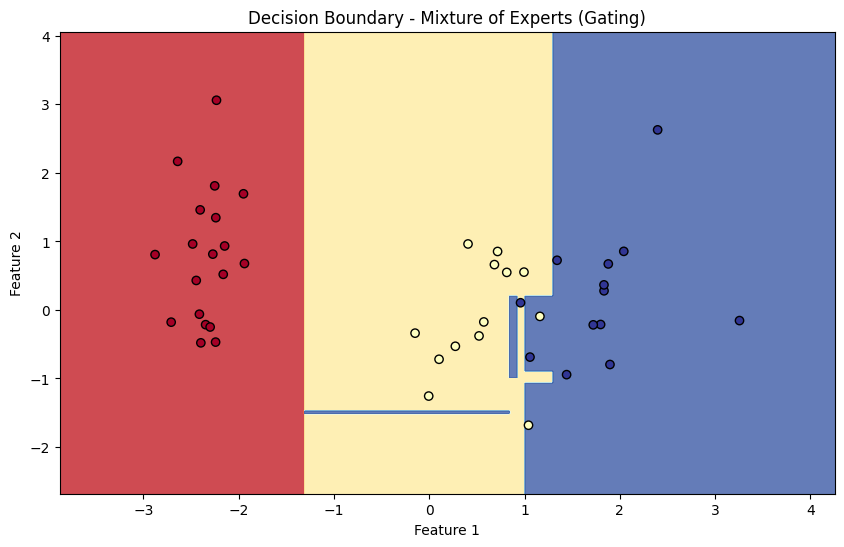

In [ ]:
expert1 = DecisionTreeClassifier(random_state=42)
expert1.fit(X_train_pca[y_train != 2], y_train[y_train != 2])

expert2 = DecisionTreeClassifier(random_state=42)
expert2.fit(X_train_pca[y_train != 1], y_train[y_train != 1])

expert3 = DecisionTreeClassifier(random_state=42)
expert3.fit(X_train_pca[y_train != 0], y_train[y_train != 0])

base_network = DecisionTreeClassifier(random_state=42)
base_network.fit(X_train_pca, y_train)

pred1_proba = expert1.predict_proba(X_test_pca)
pred2_proba = expert2.predict_proba(X_test_pca)
pred3_proba = expert3.predict_proba(X_test_pca)

aligned_pred1 = align_predictions(pred1_proba, [0, 1])
aligned_pred2 = align_predictions(pred2_proba, [0, 2])
aligned_pred3 = align_predictions(pred3_proba, [1, 2])

hard_voted = hard_voting(
    expert1.predict(X_test_pca),
    expert2.predict(X_test_pca),
    expert3.predict(X_test_pca)
)
hard_accuracy = accuracy_score(y_test, hard_voted)
print(f"Hard Voting Accuracy: {hard_accuracy:.2f}")

soft_voted = (aligned_pred1 + aligned_pred2 + aligned_pred3).argmax(axis=1)
soft_accuracy = accuracy_score(y_test, soft_voted)
print(f"Soft Voting Accuracy: {soft_accuracy:.2f}")

gating_weights = base_network.predict_proba(X_test_pca)
gating_weights /= gating_weights.sum(axis=1, keepdims=True)
gated_pred = (gating_weights * aligned_pred1 +
              gating_weights * aligned_pred2 +
              gating_weights * aligned_pred3).argmax(axis=1)
gating_accuracy = accuracy_score(y_test, gated_pred)
print(f"Gating Network Accuracy: {gating_accuracy:.2f}")

modes = ["expert1", "expert2", "expert3", "base", "soft_voting", "hard_voting", "gating"]
for mode in modes:
    plot_modes(
        X_test_pca,
        y_test,
        clf1=expert1,
        clf2=expert2,
        clf3=expert3,
        base=base_network,
        mode=mode
    )